# HH simulation


## Table of Contents 

* Defining equations of motion

## Setup

In [2]:
import numpy as np
from scipy.optimize import fsolve
from scipy.misc import derivative
import matplotlib as mpl
import matplotlib.pyplot as plt

# For retina displays only 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Defining variables and eqations of motion

There are 4 variables in the HH model 

1. $V$ (membrane voltage)
2. $n$ (activation gate for K+ channel)
3. $m$ (activation gate for Na+ channel)
4. $h$ (inactivation gate for Na+ channel)

n, m, & h rely of the rate functions which depend on V

1. $\alpha$ 
2. $\beta$

albeit with different constants depending on the gate. 

In [29]:
# Function defining external current
def static_i(t, i_0=1000):
    return(i_0) 

# Membrane voltage dynamics
def dVdt(V, n, m, h, t, i=static_i, gL=0.003, gK=0.36, gNa=1.2, eL=-54.387, eK=-77, eNa=50, c=10):
    return((1./c)*(gL*(eL-V) + gK*(n**4)*(eK-V) + gNa*(m**3)*h*(eNa-V) + i(t)))

# Voltage-gated channel subunit dynamics
def dndt(V, n):
    alpha = 0.01*(V + 55) / (1 - np.exp(-0.1*(V + 55)))
    beta = 0.125*np.exp(-0.0125*(V + 65))
    delta = alpha*(1.0-n) - beta*n
    if delta > 1.-n:
        delta = 1.-n
    elif delta < -n:
        delta = -n
    return(delta) 

def dmdt(V, m):
    alpha =  0.1*(V + 40) / (1 - np.exp(-0.1*(V + 40)))
    beta = 4*np.exp(-0.0556*(V + 65))
    delta = alpha*(1.0-m) - beta*m
    if delta > 1.-m:
        delta = 1. - m
    elif delta < -m:
        delta = -m
    return(delta) 

def dhdt(V, h):
    alpha = 0.07*np.exp(-0.05*(V + 65))
    beta = 1 / (1 + np.exp(-0.1*(V + 35)))
    delta = alpha*(1.0-h) - beta*h
    if delta > 1.-h:
        delta = 1.-h
    elif delta < -h:
        delta = -h
    return(delta) 

# Putting the dynamics together
def dSdt(V, n, m, h, t):
    return(np.array([dVdt(V, n, m, h, t), dndt(V, n), dmdt(V, m), dhdt(V, h), 1.]))

In [30]:
# Simulation functions 
DT = 0.1

# Function implimenting the midpoint method aka RK2
def find_next_point_midpoint(s, dsdt, dt=DT):
    s_test = s + dsdt(*s)*dt
    s_next = s + dsdt(*((s + s_test)/2.))*dt
    return(s_next)

# Simulation function
def simulate(s_0, t_f, dsdt=dSdt, simulation_function=find_next_point_midpoint, dt=DT, verbose=False):
    S_solution = [s_0]
    T = np.arange(s_0[-1], t_f + dt, dt)
    for t in T[1:]:
        s_previous = S_solution[-1]
        s_next = simulation_function(s_previous, dsdt, dt=dt)
        if verbose:
            print(s_next)
        S_solution.append(s_next)
    S_solution = np.array(S_solution)
    return(S_solution)

In [38]:
S_0 = [-54, 0, 0, 0, 0]

S = simulate(S_0, 2000, verbose=False)

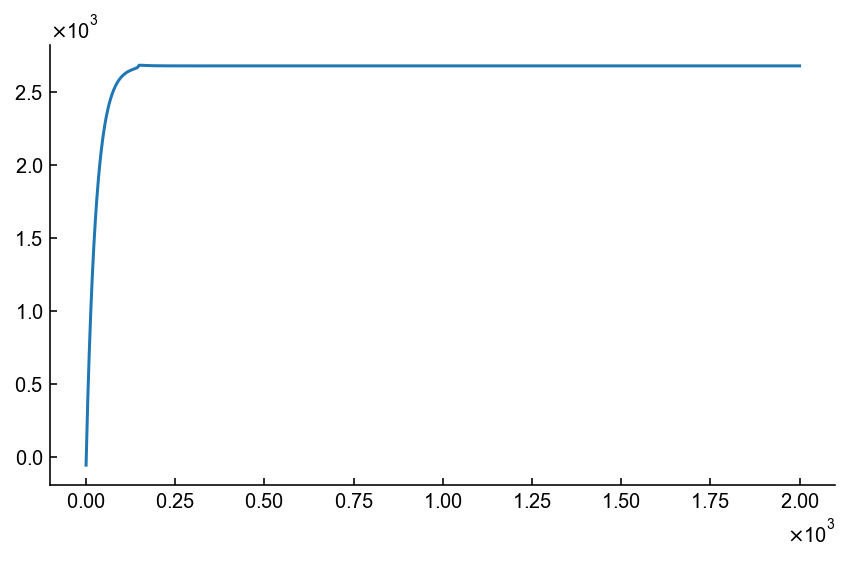

In [39]:
V = S[:,0]
T = S[:,-1]
plt.plot(T, V)

In [37]:
S[:,1]

array([0.1       , 0.11084651, 0.12747283, ..., 1.05263158, 1.05263158,
       1.05263158])